# Lab 5.0

In [452]:
import numpy as np
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt

Enter input values.

In [453]:
# number of examinations
m = 2
# number of questions on each examination
n = 10

# number of ansers correct on each examination
c = [5, 8]

# prior assumption of mean student frequency of correct anser
# must be between 0 and 1
mu = 0.85
# prior assumption of standard deviation of student skill
sigma = 0.1

# number of increments over which to calculate distribution
nx = 100

Plot prior distribution and non-Bayesian distribution.

Text(0.5,1,'1: Prior Distribution of Student Skill vs. Sample Results')

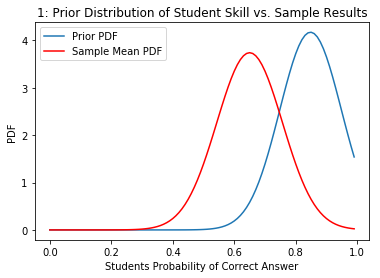

In [454]:
# create timeseries x evenly spaced with 100 values between 0 and 1
x = np.linspace(0, 1, num=nx+1)
x = np.delete(x, -1)

# Bayesian prior distribution based on past students
prior_pdf = st.norm.pdf(x, mu, sigma)
for i in range(len(prior_pdf)):
    prior_pdf[i] = prior_pdf[i] / ((x[1] - x[0])*sum(prior_pdf))
prior_cdf = (x[1] - x[0])*np.cumsum(prior_pdf)

# non-Bayesian sample mean and standard deviation based on quizzes
# using sample size of 20, where each question is independent.
# this is expected p, number of successes divided by n
p_bar = sum(c) / (m*n)

ones_and_zeros = []
for i in range(sum(c)):
    ones_and_zeros.append(1)
for j in range(m*n-sum(c)):
    ones_and_zeros.append(0)
s_bar = stats.stdev(ones_and_zeros)
# Note that s_bar determines the standard deviation in the number of right
# answers, not the standard deviation of the probability of success.

# Over n trials, the variance of the number of successes/failures is measured by
# sigma^2 = n*p*(1-p)
# and the variance of the probability of success is the above variance
# divided by n^2
# so sigma_p= sqrt(sigma^2/n^2) = sqrt(p*(1-p)/n) % as written below
nonBayes_pdf = st.norm.pdf(x, p_bar, np.sqrt(p_bar*(1-p_bar)/(m*n)))
nonBayes_cdf = (x[1] - x[0]) * np.cumsum(nonBayes_pdf)

# Plot
plt.figure()
plt.plot(x, prior_pdf, label = 'Prior PDF')
plt.plot(x, nonBayes_pdf, color='red', label='Sample Mean PDF')
plt.xlabel('Student''s Probability of Correct Answer')
plt.ylabel('PDF')
plt.legend(loc='best')
plt.title('1: Prior Distribution of Student Skill vs. Sample Results')

In [455]:
# information in just the first test
likelihood = []
for i in range(0, nx):
    # calculate likelihood of test score given student's "true" fraction correct
    likelihood.append(st.binom.pmf(c[0], n, x[i]))
    # Note, this is P(B|A)

In [456]:
# Use that information to update the prior for a new, posterior pdf
# Calculate the posterior likelihood using Bayes' Theorem

post_pdf1 = []
for j in range(0, nx-1):
    post_pdf1.append(likelihood[j] * prior_pdf[j])
    # Note that I'm not normalizing yet. I'm calculating P(B|A)*P(A)

In [457]:
# Now consider each test in sequence (some of this is repeat from above; 
# above was for illustration)

post_pdf = np.empty([m+1,nx])
post_cdf = np.empty([m+1,nx])
post_pdf.fill(np.nan)
post_cdf.fill(np.nan)

post_pdf[0] = prior_pdf   # This is P(A) for all x
post_cdf[0] = prior_cdf

likelihood = np.empty([m,nx])
likelihood.fill(np.nan)

for i in range(0, m):   # loop through each test
    for j in range(0, nx):   # loop through each incremental fraction correct
        # calculate likelihood of test score given students' "true" fraction correct
        likelihood[i,j] = st.binom.pmf(c[i], n, x[j])
        #now calculate the posterior likelihood using Bayes' Theorem
        post_pdf[i+1,j] = likelihood[i,j] * post_pdf[i,j]

        
    # normalize so that area under curve is 1 and then calculate CDF
    post_pdf[i + 1] = post_pdf[i + 1]/((x[1] - x[0])*np.nansum(post_pdf[i + 1]))
    # right here we are normalizing by P(B) which is SUM of P(B|A)*P(A)
    # over all values of A, applying the chain rule
    post_cdf[i + 1] = (x[2] - x[1])*np.cumsum(post_pdf[i + 1])

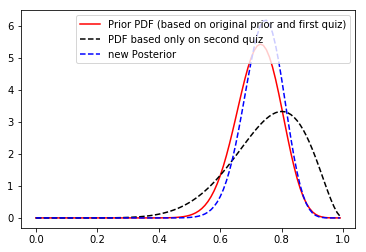

In [458]:
# Make the plot comparing the second step only

plt.figure()

plt.plot(x, post_pdf[1], 'r', label='Prior PDF (based on original prior and first quiz)')

y_likelihood = []
for j in range(len(likelihood[1])):
    y_likelihood.append(likelihood[1,j] / (sum(likelihood[1]) * (x[1] - x[0])))

plt.plot(x, y_likelihood, 'k--', label='PDF based only on second quiz')

plt.plot(x, post_pdf[2], 'b--', label='new Posterior')

plt.legend(loc='best')

Text(0.5,1,'Posterior Distributions of Student Skill')

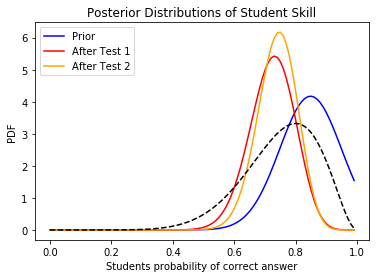

In [459]:
# plot posterior distributions

plt.figure()
plt.plot(x, post_pdf[0],'b', label='Prior')
plt.plot(x, post_pdf[1], 'r', label='After Test 1')
plt.plot(x, post_pdf[2], 'orange', label='After Test 2')
plt.plot(x, y_likelihood, 'k--')
plt.xlabel('Student''s probability of correct answer')
plt.ylabel('PDF')
plt.legend(loc='best')
plt.title('Posterior Distributions of Student Skill')

Text(0,0.5,'PDF')

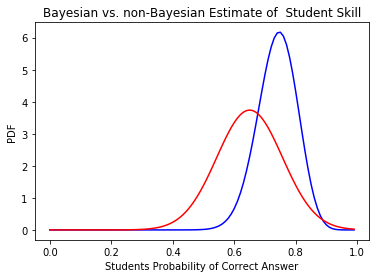

In [460]:
# Plot posterior versus non-Bayesian estimate

plt.figure()
plt.plot(x, post_pdf[m], 'b', label='Bayesian')
plt.plot(x, nonBayes_pdf, 'r', label = 'Non-Bayesian')
plt.title('Bayesian vs. non-Bayesian Estimate of  Student Skill')
plt.xlabel('Student''s Probability of Correct Answer')
plt.ylabel('PDF')

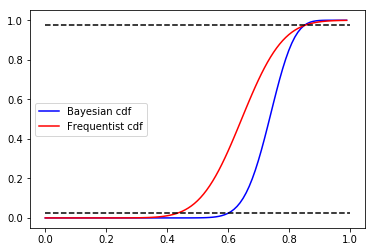

In [461]:
# Look for 95% Confidence intervals

plt.figure()
plt.plot(x, post_cdf[2], 'b', label='Bayesian cdf')
plt.plot(x, nonBayes_cdf, 'r',label='Frequentist cdf')
plt.plot([0,1],[0.025, 0.025], 'k--')
plt.plot([0,1],[0.975, 0.975], 'k--')
plt.legend(loc='best')